# **Assignment Solutions – 240655 Mitanshi**

## **Problem 1 – DataSample Class**

In [6]:

class DataSample:
    """A data container storing numerical features and a label."""
    def __init__(self, features, label):
        self.features = [float(x) for x in features]
        self.label = label

    def min_max_norm(self):
        if not self.features:
            return
        min_val = min(self.features)
        max_val = max(self.features)
        denom = max_val - min_val
        if denom == 0:
            self.features = [0.0 for _ in self.features]
        else:
            self.features = [(x - min_val) / denom for x in self.features]

    def scaled(self, factor):
        return [x * factor for x in self.features]


## **Problem 2 – sort_by_unique_chars Function**

In [7]:

def sort_by_unique_chars(words):
    """Sort strings by number of unique characters (desc), then alphabetically."""
    return sorted(words, key=lambda w: (-len(set(w)), w))


## **NumPy Problem 1**

In [8]:

import numpy as np

X = np.random.randint(0, 101, size=(10, 10))
mask = (X >= 20) & (X <= 50)
X[mask] = -1

sub = X[2:8, 3:9]
indices = np.arange(6)
diag_vals = sub[indices, indices]

i = np.arange(10).reshape(-1, 1)
j = np.arange(10)
M = (i - j) ** 2


## **NumPy Problem 2**

In [9]:

import numpy as np

scores = np.random.randint(0, 21, size=(5, 4))
row_max = scores.max(axis=1, keepdims=True)
shifted_scores = scores - row_max

exp_scores = np.exp(shifted_scores)
row_sums = exp_scores.sum(axis=1, keepdims=True)
probs = exp_scores / row_sums

y_pred = probs.argmax(axis=1)
y_true = np.random.randint(0, 4, size=5)

correct_mask = (y_pred == y_true)
accuracy = correct_mask.mean()


## **Section 3 – Pandas & MatPlotLib Operations**

File 'StudentsPerformance.csv' not found locally. Downloading from GitHub...
Download complete.
Loaded dataframe shape: (1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Train size: 800, Test size: 200
\nRace distribution (train):
race/ethnicity
group A    0.08625
group B    0.19125
group C    0.32500
group D    0.25250
group E    0.14500
Name: proportion, dtype: float64
\nRace distribution (test):
race/ethnicity
group A    0.100
group B    0.185
group C    0.295
group D    0.300
group E    0.120
Name: proportion, dtype: float64
Balanced split -> train: 800, test: 200
Number of batches from train_df: 16
Batch 0 size: 50


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


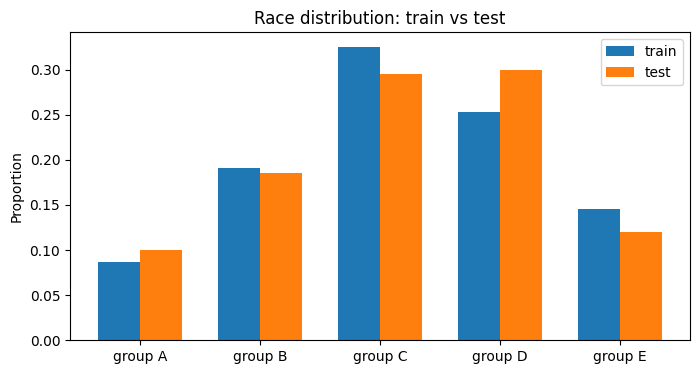

In [10]:
# Ensure required libs are available
import os
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

# URL for the dataset (raw GitHub)
csv_url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"
csv_filename = "StudentsPerformance.csv"

# 1) Download the file if it does not exist
if not os.path.exists(csv_filename):
    print(f"File '{csv_filename}' not found locally. Downloading from GitHub...")
    urlretrieve(csv_url, csv_filename)
    print("Download complete.")
else:
    print(f"File '{csv_filename}' already exists. Using local copy.")

# 2) Read the CSV
df = pd.read_csv(csv_filename)
print("Loaded dataframe shape:", df.shape)
display(df.head())   # in Colab/Jupyter this nicely shows the first 5 rows

# 3) Create sorted dataframes
df_gender = df.sort_values("gender")
df_race = df.sort_values("race/ethnicity")
df_math = df.sort_values("math score")
df_read = df.sort_values("reading score")
df_write = df.sort_values("writing score")

# 4) Create train/test split (20% test)
test_df = df.sample(frac=0.2, random_state=42)
train_df = df.drop(test_df.index)
print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")

# 5) Race distribution comparison (proportions)
race_train = train_df["race/ethnicity"].value_counts(normalize=True).sort_index()
race_test = test_df["race/ethnicity"].value_counts(normalize=True).sort_index()
print("\\nRace distribution (train):")
print(race_train)
print("\\nRace distribution (test):")
print(race_test)

# 6) Produce a more balanced-ish split by selecting every 5th row (sorted by race)
df_sorted_race = df.sort_values("race/ethnicity").reset_index(drop=True)
test_balanced = df_sorted_race.iloc[::5]         # roughly 20%
train_balanced = df_sorted_race.drop(test_balanced.index)
print(f"Balanced split -> train: {len(train_balanced)}, test: {len(test_balanced)}")

# 7) Create batches of size 50 from train_df
batch_size = 50
batches = [train_df.iloc[i:i+batch_size].reset_index(drop=True)
           for i in range(0, len(train_df), batch_size)]
print("Number of batches from train_df:", len(batches))
print("Batch 0 size:", len(batches[0]))
display(batches[0].head())

# 8) Optional: a bar plot comparing race proportions in train and test
fig, ax = plt.subplots(figsize=(8,4))
# align indices and fill missing categories with 0
all_races = sorted(set(df["race/ethnicity"]))
train_props = [race_train.get(r, 0) for r in all_races]
test_props  = [race_test.get(r, 0)  for r in all_races]

x = range(len(all_races))
width = 0.35
ax.bar([p - width/2 for p in x], train_props, width=width, label="train")
ax.bar([p + width/2 for p in x], test_props, width=width, label="test")
ax.set_xticks(x)
ax.set_xticklabels(all_races)
ax.set_ylabel("Proportion")
ax.set_title("Race distribution: train vs test")
ax.legend()
plt.show()
